## ARBOLES DE DECISION

In [65]:
# Análisis Exploratorio de los Datos
# Importar bibliotecas
# Importamos las librerías

import pandas as pd   
import numpy as np     
import seaborn as sns   
import matplotlib.pyplot as plt 

from sklearn import metrics 
from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import precision_score


In [5]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
data.shape

(1599, 12)

In [9]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [119]:
# Limpieza de Datos
# Verificar si hay valores nulos en las columnas
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

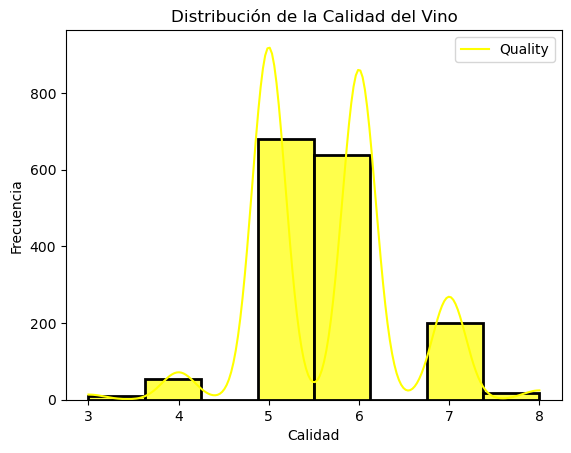

In [111]:
# Histograma moderno de la variable objetivo
sns.histplot(data['quality'], kde = True, color = 'yellow', bins = 8, alpha = 0.7, linewidth = 2, edgecolor = 'black')
# Título
plt.title('Distribución de la Calidad del Vino')
# Etiqueta eje x
plt.xlabel('Calidad')
# Etiqueta eje y
plt.ylabel('Frecuencia')
# Leyenda
plt.legend(['Quality'])
# Mostrar gráfico
plt.show()

<Axes: xlabel='fixed acidity', ylabel='alcohol'>

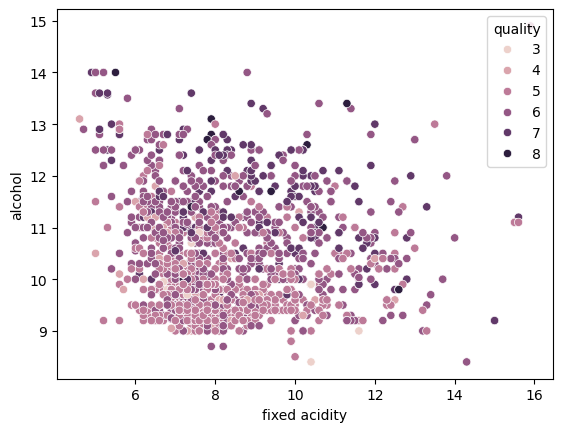

In [75]:
#estadistica calidad
sns.scatterplot(x="fixed acidity", y="alcohol", hue= "quality" ,data=data)

## observacion

### para conocer la calidad de un vino debe tener un balance en entre la acidez y el alcohol

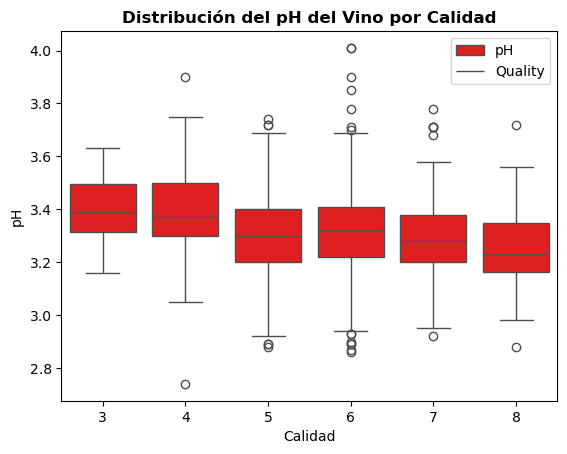

In [117]:
# Grafico de caja de la variable pH y calidad
sns.boxplot(x = data['quality'], y = data['pH'], color = 'red')
# Título
plt.title('Distribución del pH del Vino por Calidad', fontweight = 'bold')
# Etiqueta eje x
plt.xlabel('Calidad')
# Etiqueta eje y
plt.ylabel('pH')
# Leyenda
plt.legend(['pH', 'Quality'])
# Mostar gráfico
plt.show()

In [138]:
predictors_col = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar"]
target_col = ['quality']

In [140]:
predictors = data[predictors_col]
target = data[target_col]


In [142]:
predictors

,fixed acidity,volatile acidity,citric acid,residual sugar
0,7.4,0.700,0.00,1.9
1,7.8,0.880,0.00,2.6
2,7.8,0.760,0.04,2.3
3,11.2,0.280,0.56,1.9
4,7.4,0.700,0.00,1.9
...,...,...,...,...
1594,6.2,0.600,0.08,2.0
1595,5.9,0.550,0.10,2.2
1596,6.3,0.510,0.13,2.3
1597,5.9,0.645,0.12,2.0


In [144]:
corr = predictors.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar
fixed acidity,1.000000,-0.256131,0.671703,0.114777
volatile acidity,-0.256131,1.000000,-0.552496,0.001918
citric acid,0.671703,-0.552496,1.000000,0.143577
residual sugar,0.114777,0.001918,0.143577,1.000000


 ## Observación
### Vemos una mejora sustancial en el desempeño del modelo.

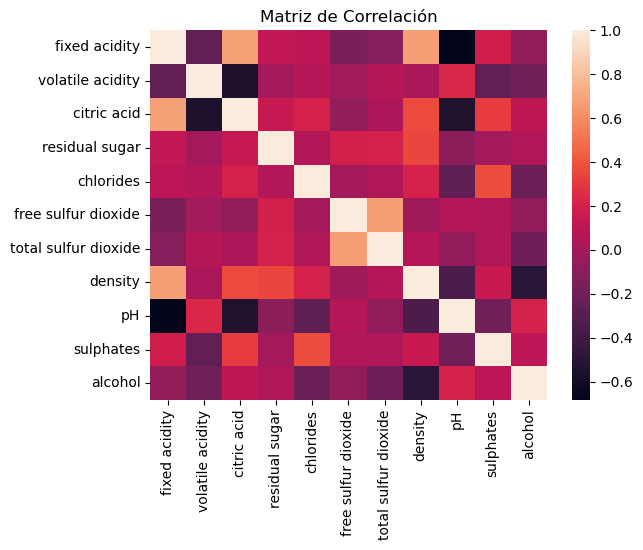

In [43]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

## OBSERVACIONES DEL ANÁLISIS EXPLORATORIO DE DATOS (EDA)
### -La variable alcohol tiene una correlación positiva con la calidad del vino (quality).
### -La variable density tiene una correlación positiva con fixed acidity.
### -La variable total sulfur dioxity tiene una correlación positiva con free sulfur dioxity.
### -La variable citric acidity tiene una correlación positiva con fixed acidity.
### -La variable fixed acidity tiene una correlación negativa con density.
### -La variable alcohol tiene una correlación negativa con density.
### -La variable Ph tiene una correlación negativa con fixed acidity.

In [249]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.4, random_state=16)

In [257]:
tree = DecisionTreeClassifier(max_depth=2)

In [259]:
arbol = tree.fit(X_train, y_train)

[Text(0.5, 0.8333333333333334, 'x[1] <= 0.405\ngini = 0.641\nsamples = 959\nvalue = [4.0, 29.0, 415.0, 377.0, 121.0, 13.0]'),
 Text(0.25, 0.5, 'x[2] <= 0.305\ngini = 0.655\nsamples = 266\nvalue = [0, 1, 59, 124, 74, 8]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.577\nsamples = 44\nvalue = [0, 1, 18, 22, 3, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.651\nsamples = 222\nvalue = [0, 0, 41, 102, 71, 8]'),
 Text(0.75, 0.5, 'x[0] <= 9.95\ngini = 0.597\nsamples = 693\nvalue = [4.0, 28.0, 356.0, 253.0, 47.0, 5.0]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.579\nsamples = 606\nvalue = [4, 25, 329, 211, 33, 4]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.643\nsamples = 87\nvalue = [0, 3, 27, 42, 14, 1]')]

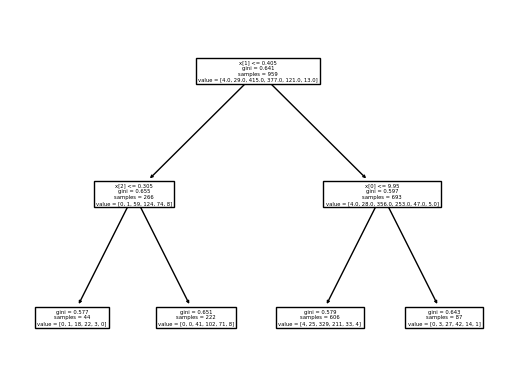

In [261]:
plot_tree(arbol)

In [245]:
predicciones = arbol.predict(X_test)

In [247]:
predicciones

array([6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6,
       6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 5,
       6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6,
       6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6,
       5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5,
       6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5,
       6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6,
       5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5,
       5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6,
       6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5,
       6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5,
       5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6,
       6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5,

In [176]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,1,1,0,0
4,0,0,4,1,0,0
5,2,7,88,32,10,0
6,3,1,39,78,9,3
7,0,0,10,13,17,0
8,0,0,1,0,0,0


In [179]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.5856854700854701

In [181]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.571875

In [183]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.5783284829466044